In [184]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import pi
sns.set(style='whitegrid')

In [185]:
# Cargar datos desde GitHub
url = "https://raw.githubusercontent.com/ivoryraeg/Proyecto-3-Evaluacion-Software/main/guess_proyecto3_datos.xlsx"
df = pd.read_excel(url)
df.head()

,user_id,version,Aesthetics,Play Engrossment,Enjoyment,Personal Gratification,Creative Freedom,Social Connectivity,Narrative,Usability/Playability,...,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46
0,user_1,v1,4.25,4.857143,3.833333,4.25,5.25,4,4,4.571429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,user_2,v1,5,4.714286,3.666667,4,4.75,4.2,3.5,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,user_3,v1,4.75,5.142857,4.666667,4.5,4.25,4.8,4.25,4.571429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,user_4,v1,5,4.714286,4.666667,5.25,5,4.6,4.75,4.714286,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,user_5,v1,4.25,4.428571,4.166667,4.25,5,4.8,4.5,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [186]:
# prompt: drop from the row 102 to the row 212

df = df.drop(df.index[100:213])
df = df.drop(df.columns[11:47], axis=1)

In [187]:
df.head(100)

,user_id,version,Aesthetics,Play Engrossment,Enjoyment,Personal Gratification,Creative Freedom,Social Connectivity,Narrative,Usability/Playability,Visual Aesthetics
0,user_1,v1,4.25,4.857143,3.833333,4.25,5.25,4,4,4.571429,4.5
1,user_2,v1,5,4.714286,3.666667,4,4.75,4.2,3.5,4,4
2,user_3,v1,4.75,5.142857,4.666667,4.5,4.25,4.8,4.25,4.571429,4.25
3,user_4,v1,5,4.714286,4.666667,5.25,5,4.6,4.75,4.714286,4.5
4,user_5,v1,4.25,4.428571,4.166667,4.25,5,4.8,4.5,4,4.5
...,...,...,...,...,...,...,...,...,...,...,...
95,user_46,v2,4,5,4.333333,5,5.5,4.4,5.25,5,5
96,user_47,v2,5,4.714286,5.5,4.5,4.5,4.8,5.5,4.857143,5
97,user_48,v2,3.75,5.142857,5.166667,4.5,5,4.8,5.25,4.857143,4.5
98,user_49,v2,4.75,5.142857,4.666667,4.25,5.25,4.8,4.25,4,5.5


In [188]:
# Check data types
print(df.dtypes)

# Convert relevant columns to numeric, coercing errors
for col in ['Aesthetics', 'Play Engrossment', 'Enjoyment', 'Personal Gratification', 'Creative Freedom', 'Social Connectivity', 'Narrative', 'Usability/Playability', 'Visual Aesthetics']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

mean_scores = df.drop(columns=['user_id']).groupby('version').mean(numeric_only=True).reset_index()
display(mean_scores)

user_id                   object
version                   object
Aesthetics                object
Play Engrossment          object
Enjoyment                 object
Personal Gratification    object
Creative Freedom          object
Social Connectivity       object
Narrative                 object
Usability/Playability     object
Visual Aesthetics         object
dtype: object


,version,Aesthetics,Play Engrossment,Enjoyment,Personal Gratification,Creative Freedom,Social Connectivity,Narrative,Usability/Playability,Visual Aesthetics
0,v1,4.525,4.528571,4.380000,4.46,5.03,4.472,4.425,4.454286,4.405
1,v2,4.895,4.920000,4.823333,4.81,5.02,4.864,4.840,4.842857,4.815


In [189]:
std_dev_scores = df.drop(columns=['user_id']).groupby('version').std(numeric_only=True).reset_index()
display(std_dev_scores)

,version,Aesthetics,Play Engrossment,Enjoyment,Personal Gratification,Creative Freedom,Social Connectivity,Narrative,Usability/Playability,Visual Aesthetics
0,v1,0.446786,0.384248,0.346737,0.452769,0.301527,0.399510,0.537497,0.347167,0.425255
1,v2,0.425854,0.400083,0.358584,0.453332,0.293814,0.390583,0.511999,0.383163,0.377323


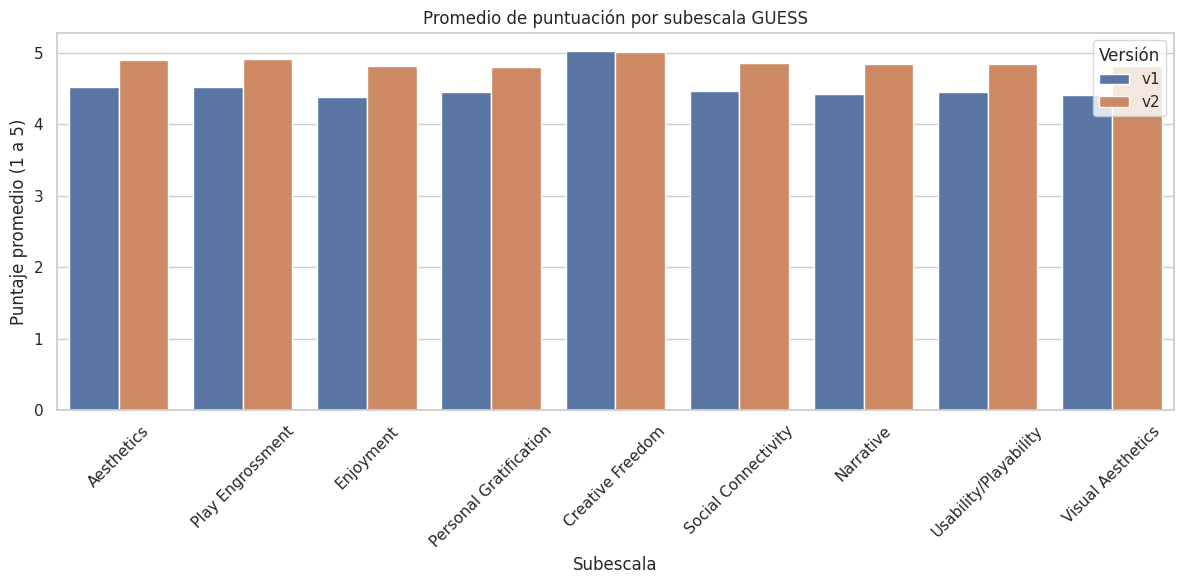

In [190]:
# Gráfico de barras agrupadas por subescala
mean_melted = mean_scores.melt(id_vars='version', var_name='subescala', value_name='puntaje')
plt.figure(figsize=(12, 6))
sns.barplot(data=mean_melted, x='subescala', y='puntaje', hue='version')
plt.title('Promedio de puntuación por subescala GUESS')
plt.xticks(rotation=45)
plt.ylabel('Puntaje promedio (1 a 5)')
plt.xlabel('Subescala')
plt.legend(title='Versión')
plt.tight_layout()
plt.show()

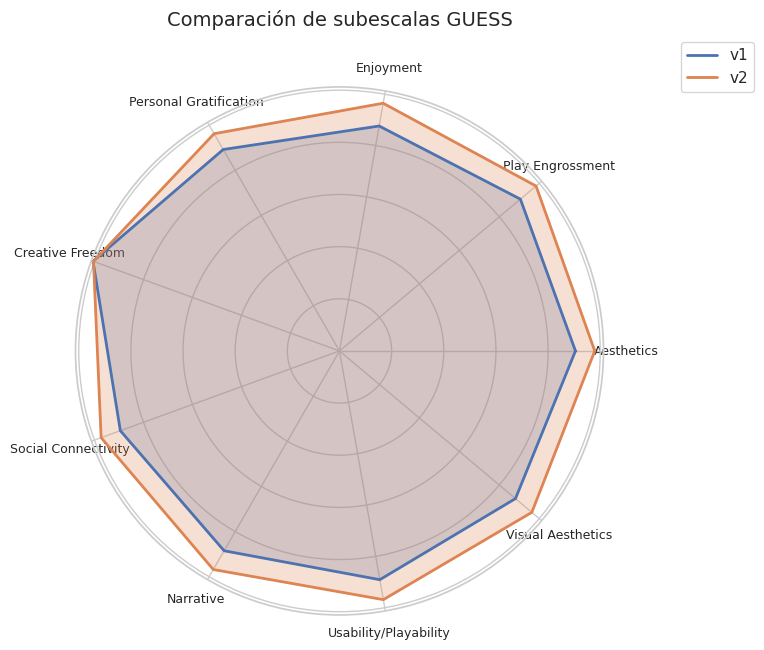

In [191]:
# Radar chart comparativo con todas las versiones (con área rellena)
labels = mean_scores.columns[1:].tolist()
angles = [n / float(len(labels)) * 2 * pi for n in range(len(labels))]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Dibujar cada línea con su área rellena
for i, row in mean_scores.iterrows():
    stats = row[1:].tolist()
    stats += stats[:1]
    ax.plot(angles, stats, label=row['version'], linewidth=2)
    ax.fill(angles, stats, alpha=0.25)  # área bajo la curva

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=9)
ax.set_yticklabels([])
ax.set_title('Comparación de subescalas GUESS', size=14, y=1.1)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()

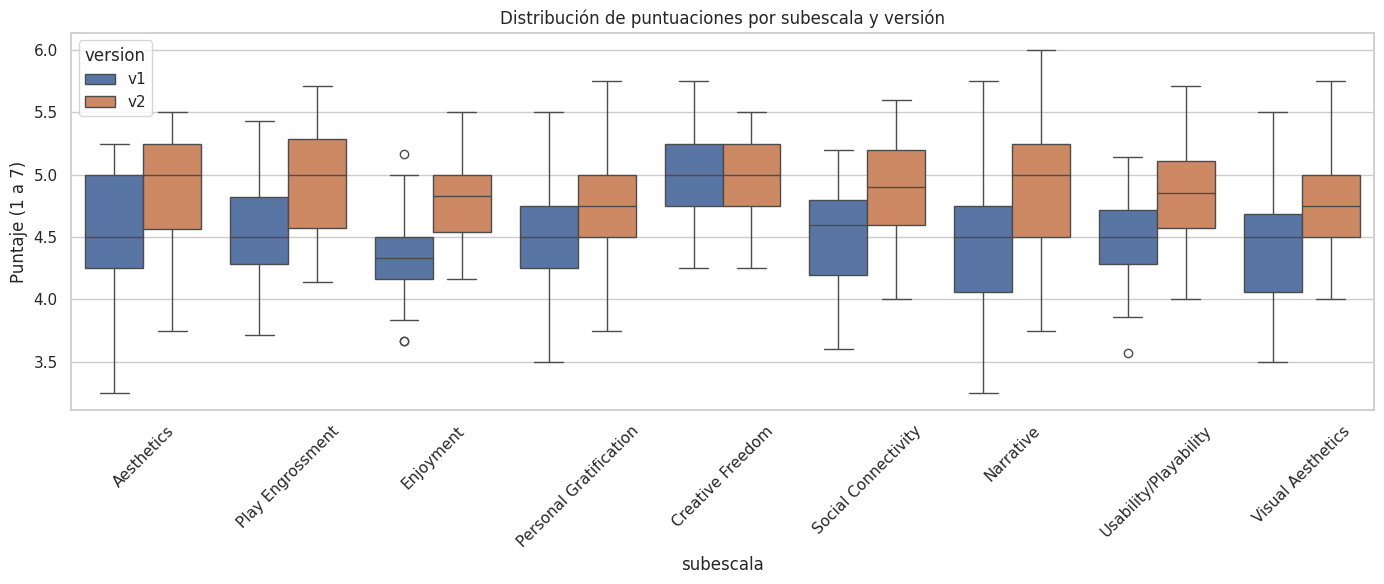

In [192]:
df_melted = df.melt(id_vars=['version', 'user_id'], var_name='subescala', value_name='puntaje')

plt.figure(figsize=(14, 6))
sns.boxplot(data=df_melted, x='subescala', y='puntaje', hue='version')
plt.title('Distribución de puntuaciones por subescala y versión')
plt.xticks(rotation=45)
plt.ylabel('Puntaje (1 a 7)')
plt.tight_layout()
plt.show()



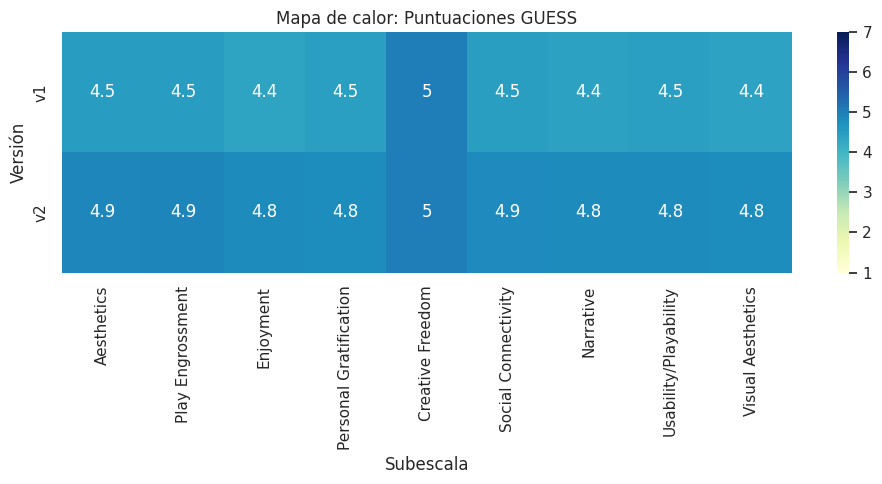

In [193]:
plt.figure(figsize=(10, 5))
sns.heatmap(mean_scores.set_index('version'), annot=True, cmap='YlGnBu', cbar=True, vmin=1, vmax=7)
plt.title('Mapa de calor: Puntuaciones GUESS')
plt.xlabel('Subescala')
plt.ylabel('Versión')
plt.tight_layout()
plt.show()


t-statistic: [-4.2387879]
p-value: 0.00005


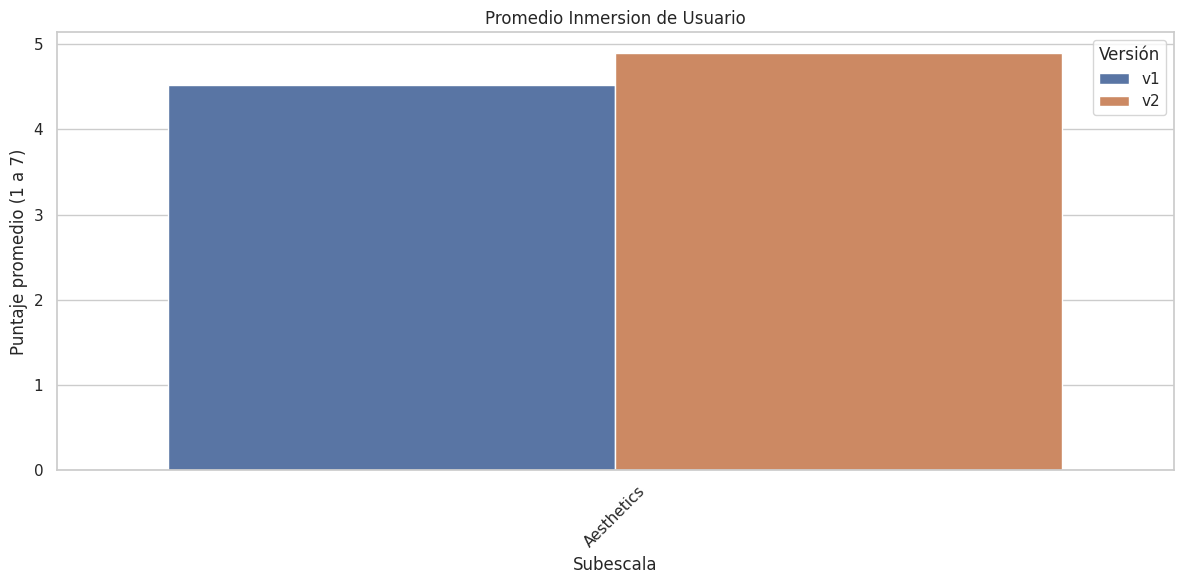

In [194]:
from scipy import stats

df_v1 = df[df['version'] == 'v1'][['Aesthetics']]
df_v2 = df[df['version'] == 'v2'][['Aesthetics']]

t_stat,pvalue = stats.ttest_ind(df_v1, df_v2)

print(f"t-statistic: {t_stat}")
print(f"p-value: {pvalue[0]:.5f}")

inmersion = df[['version', 'Aesthetics']]

mean_scores = inmersion.groupby('version').mean(numeric_only=True).reset_index()

# Gráfico de barras agrupadas por subescala
mean_melted = mean_scores.melt(id_vars='version', var_name='subescala', value_name='puntaje')
plt.figure(figsize=(12, 6))
sns.barplot(data=mean_melted, x='subescala', y='puntaje', hue='version')
plt.title('Promedio Inmersion de Usuario')
plt.xticks(rotation=45)
plt.ylabel('Puntaje promedio (1 a 7)')
plt.xlabel('Subescala')
plt.legend(title='Versión')
plt.tight_layout()
plt.show()

t-statistic: [-4.98958337]
p-value: 0.000003


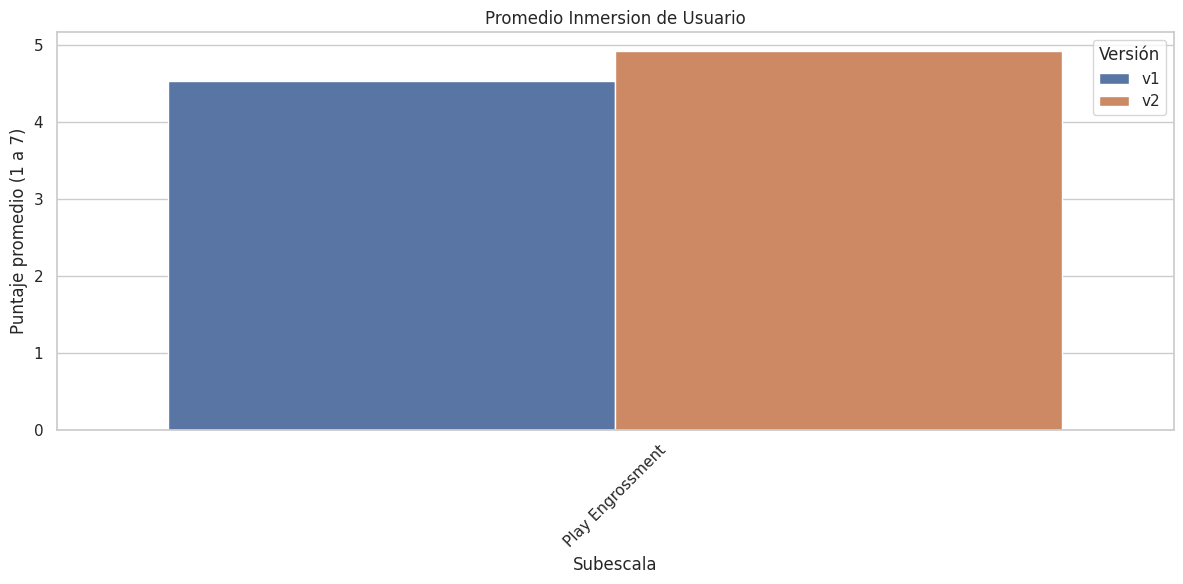

In [195]:
df_v1 = df[df['version'] == 'v1'][['Play Engrossment']]
df_v2 = df[df['version'] == 'v2'][['Play Engrossment']]

t_stat,pvalue = stats.ttest_ind(df_v1, df_v2)

print(f"t-statistic: {t_stat}")
print(f"p-value: {pvalue[0]:.6f}")

inmersion = df[['version', 'Play Engrossment']]

mean_scores = inmersion.groupby('version').mean(numeric_only=True).reset_index()

# Gráfico de barras agrupadas por subescala
mean_melted = mean_scores.melt(id_vars='version', var_name='subescala', value_name='puntaje')
plt.figure(figsize=(12, 6))
sns.barplot(data=mean_melted, x='subescala', y='puntaje', hue='version')
plt.title('Promedio Inmersion de Usuario')
plt.xticks(rotation=45)
plt.ylabel('Puntaje promedio (1 a 7)')
plt.xlabel('Subescala')
plt.legend(title='Versión')
plt.tight_layout()
plt.show()

t-statistic: [-6.28466146]
p-value: 0.00000001


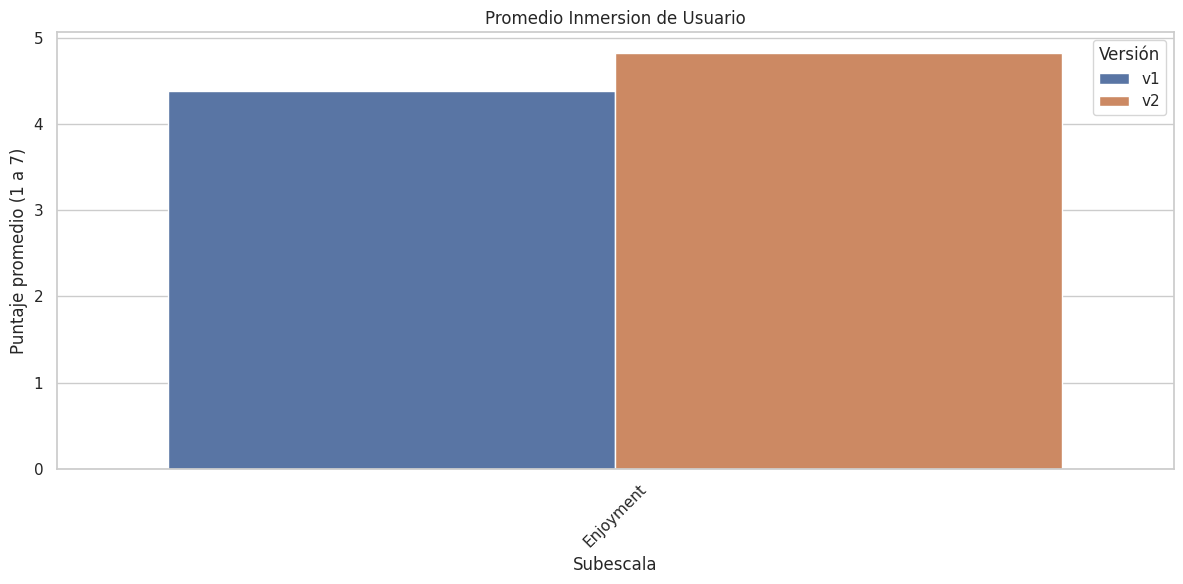

In [196]:
df_v1 = df[df['version'] == 'v1'][['Enjoyment']]
df_v2 = df[df['version'] == 'v2'][['Enjoyment']]

t_stat,pvalue = stats.ttest_ind(df_v1, df_v2)

print(f"t-statistic: {t_stat}")
print(f"p-value: {pvalue[0]:.8f}")

inmersion = df[['version', 'Enjoyment']]

mean_scores = inmersion.groupby('version').mean(numeric_only=True).reset_index()

# Gráfico de barras agrupadas por subescala
mean_melted = mean_scores.melt(id_vars='version', var_name='subescala', value_name='puntaje')
plt.figure(figsize=(12, 6))
sns.barplot(data=mean_melted, x='subescala', y='puntaje', hue='version')
plt.title('Promedio Inmersion de Usuario')
plt.xticks(rotation=45)
plt.ylabel('Puntaje promedio (1 a 7)')
plt.xlabel('Subescala')
plt.legend(title='Versión')
plt.tight_layout()
plt.show()

t-statistic: [-3.86270079]
p-value: 0.00020


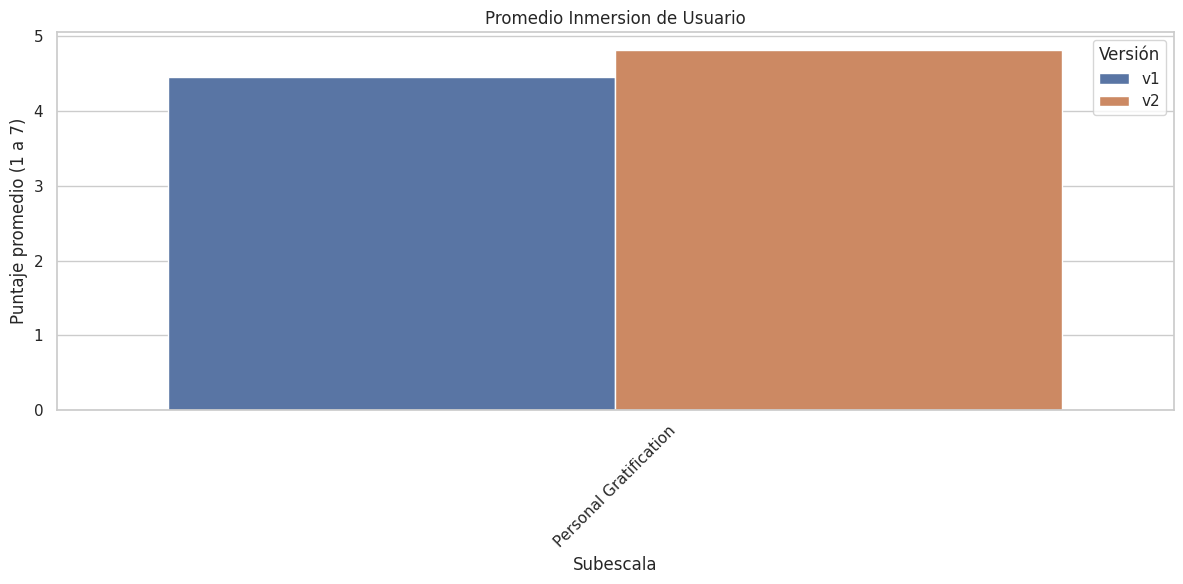

In [197]:
df_v1 = df[df['version'] == 'v1'][['Personal Gratification']]
df_v2 = df[df['version'] == 'v2'][['Personal Gratification']]

t_stat,pvalue = stats.ttest_ind(df_v1, df_v2)

print(f"t-statistic: {t_stat}")
print(f"p-value: {pvalue[0]:.5f}")

inmersion = df[['version', 'Personal Gratification']]

mean_scores = inmersion.groupby('version').mean(numeric_only=True).reset_index()

# Gráfico de barras agrupadas por subescala
mean_melted = mean_scores.melt(id_vars='version', var_name='subescala', value_name='puntaje')
plt.figure(figsize=(12, 6))
sns.barplot(data=mean_melted, x='subescala', y='puntaje', hue='version')
plt.title('Promedio Inmersion de Usuario')
plt.xticks(rotation=45)
plt.ylabel('Puntaje promedio (1 a 7)')
plt.xlabel('Subescala')
plt.legend(title='Versión')
plt.tight_layout()
plt.show()

t-statistic: [0.16795701]
p-value: 0.86696


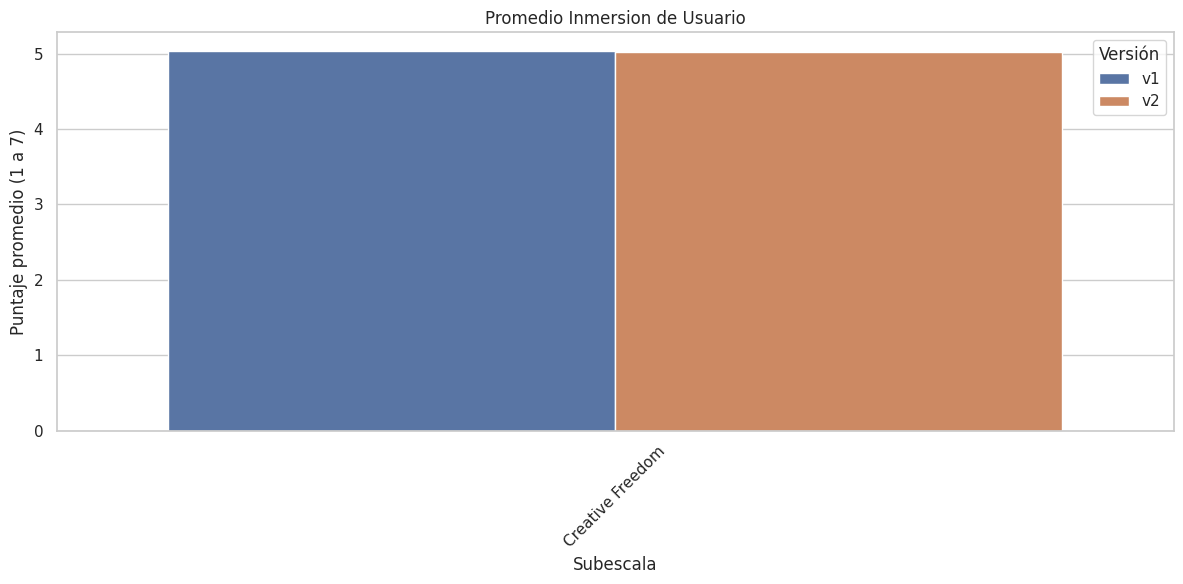

In [198]:
df_v1 = df[df['version'] == 'v1'][['Creative Freedom']]
df_v2 = df[df['version'] == 'v2'][['Creative Freedom']]

t_stat,pvalue = stats.ttest_ind(df_v1, df_v2)

print(f"t-statistic: {t_stat}")
print(f"p-value: {pvalue[0]:.5f}")

inmersion = df[['version', 'Creative Freedom']]

mean_scores = inmersion.groupby('version').mean(numeric_only=True).reset_index()

# Gráfico de barras agrupadas por subescala
mean_melted = mean_scores.melt(id_vars='version', var_name='subescala', value_name='puntaje')
plt.figure(figsize=(12, 6))
sns.barplot(data=mean_melted, x='subescala', y='puntaje', hue='version')
plt.title('Promedio Inmersion de Usuario')
plt.xticks(rotation=45)
plt.ylabel('Puntaje promedio (1 a 7)')
plt.xlabel('Subescala')
plt.legend(title='Versión')
plt.tight_layout()
plt.show()

t-statistic: [-4.96112502]
p-value: 0.000003


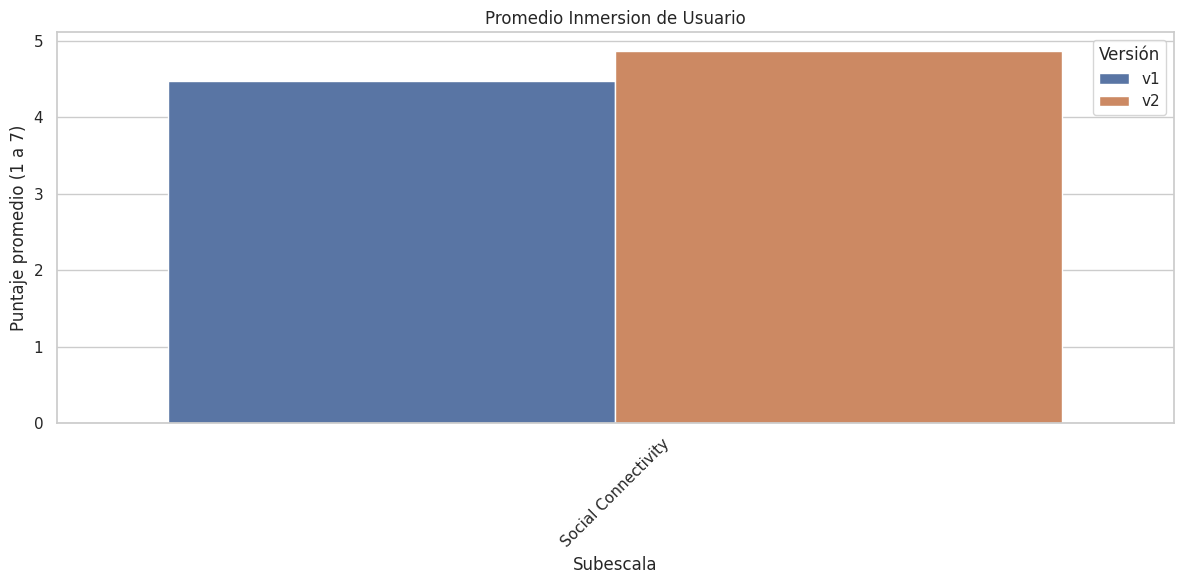

In [199]:
df_v1 = df[df['version'] == 'v1'][['Social Connectivity']]
df_v2 = df[df['version'] == 'v2'][['Social Connectivity']]

t_stat,pvalue = stats.ttest_ind(df_v1, df_v2)

print(f"t-statistic: {t_stat}")
print(f"p-value: {pvalue[0]:.6f}")

inmersion = df[['version', 'Social Connectivity']]

mean_scores = inmersion.groupby('version').mean(numeric_only=True).reset_index()

# Gráfico de barras agrupadas por subescala
mean_melted = mean_scores.melt(id_vars='version', var_name='subescala', value_name='puntaje')
plt.figure(figsize=(12, 6))
sns.barplot(data=mean_melted, x='subescala', y='puntaje', hue='version')
plt.title('Promedio Inmersion de Usuario')
plt.xticks(rotation=45)
plt.ylabel('Puntaje promedio (1 a 7)')
plt.xlabel('Subescala')
plt.legend(title='Versión')
plt.tight_layout()
plt.show()

t-statistic: [-3.95311277]
p-value: 0.0001


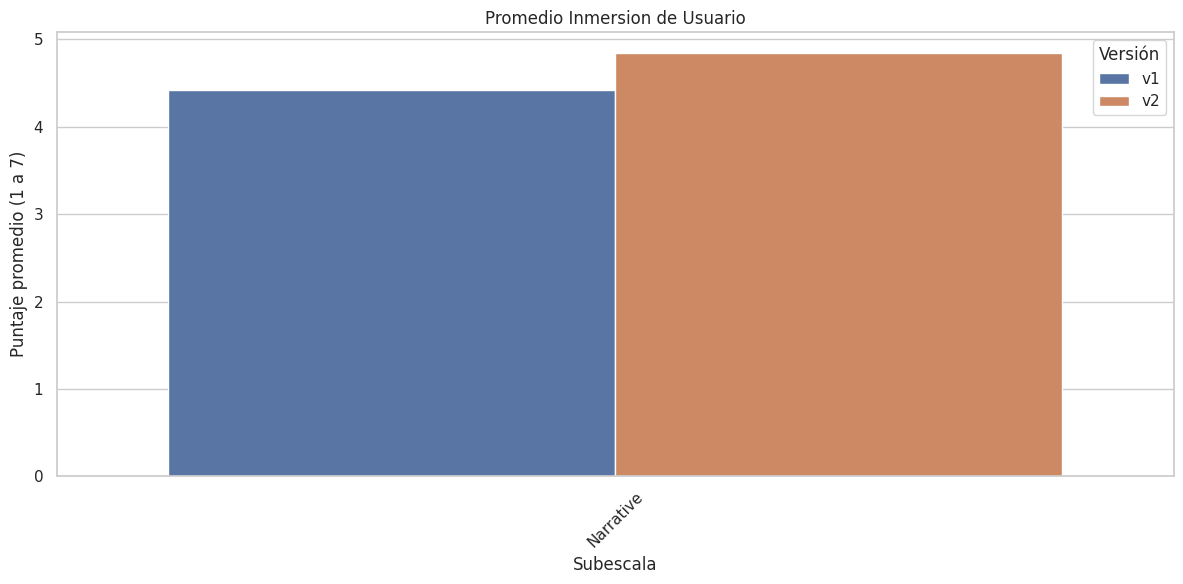

In [200]:
df_v1 = df[df['version'] == 'v1'][['Narrative']]
df_v2 = df[df['version'] == 'v2'][['Narrative']]

t_stat,pvalue = stats.ttest_ind(df_v1, df_v2)

print(f"t-statistic: {t_stat}")
print(f"p-value: {pvalue[0]:.4f}")

inmersion = df[['version', 'Narrative']]

mean_scores = inmersion.groupby('version').mean(numeric_only=True).reset_index()

# Gráfico de barras agrupadas por subescala
mean_melted = mean_scores.melt(id_vars='version', var_name='subescala', value_name='puntaje')
plt.figure(figsize=(12, 6))
sns.barplot(data=mean_melted, x='subescala', y='puntaje', hue='version')
plt.title('Promedio Inmersion de Usuario')
plt.xticks(rotation=45)
plt.ylabel('Puntaje promedio (1 a 7)')
plt.xlabel('Subescala')
plt.legend(title='Versión')
plt.tight_layout()
plt.show()

t-statistic: [-5.31404251]
p-value: 0.000001


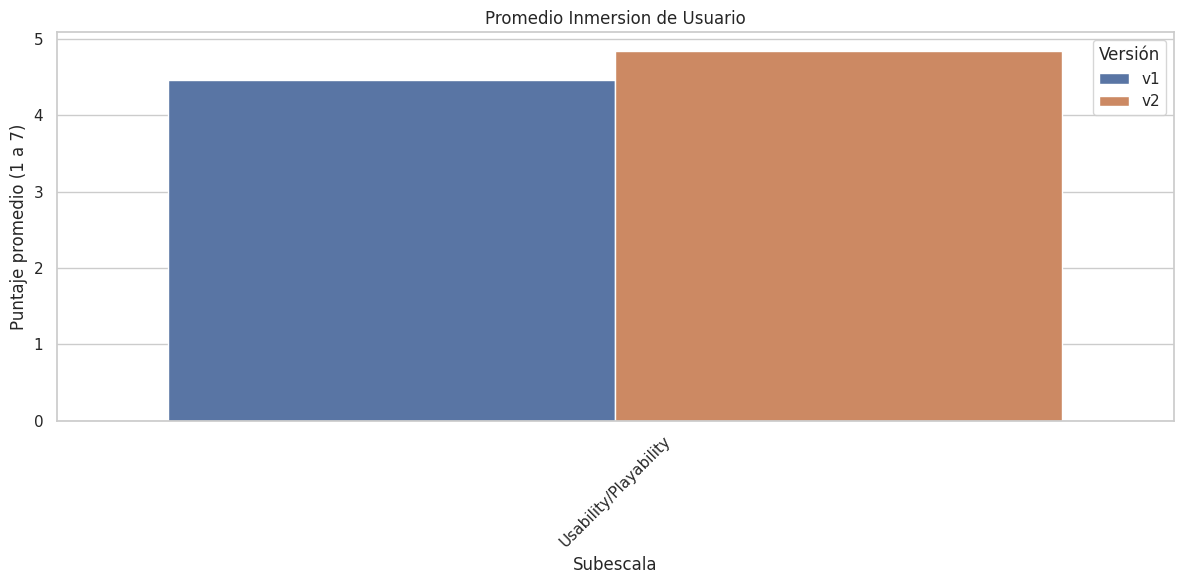

In [201]:
df_v1 = df[df['version'] == 'v1'][['Usability/Playability']]
df_v2 = df[df['version'] == 'v2'][['Usability/Playability']]

t_stat,pvalue = stats.ttest_ind(df_v1, df_v2)

print(f"t-statistic: {t_stat}")
print(f"p-value: {pvalue[0]:.6f}")

inmersion = df[['version', 'Usability/Playability']]

mean_scores = inmersion.groupby('version').mean(numeric_only=True).reset_index()

# Gráfico de barras agrupadas por subescala
mean_melted = mean_scores.melt(id_vars='version', var_name='subescala', value_name='puntaje')
plt.figure(figsize=(12, 6))
sns.barplot(data=mean_melted, x='subescala', y='puntaje', hue='version')
plt.title('Promedio Inmersion de Usuario')
plt.xticks(rotation=45)
plt.ylabel('Puntaje promedio (1 a 7)')
plt.xlabel('Subescala')
plt.legend(title='Versión')
plt.tight_layout()
plt.show()

t-statistic: [-5.0994529]
p-value: 0.000002


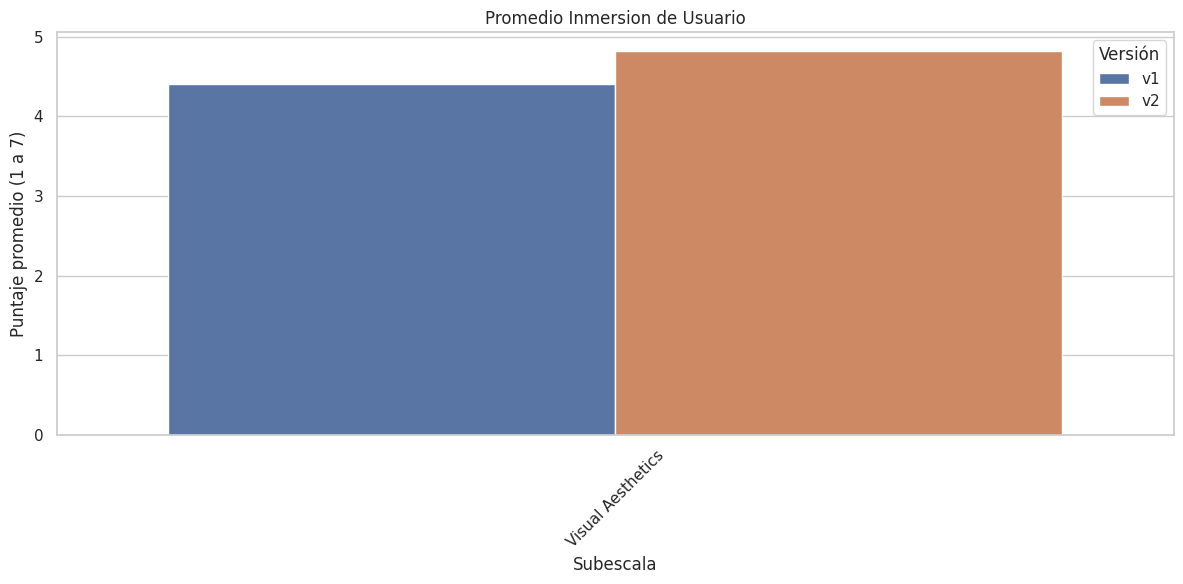

In [202]:
df_v1 = df[df['version'] == 'v1'][['Visual Aesthetics']]
df_v2 = df[df['version'] == 'v2'][['Visual Aesthetics']]

t_stat,pvalue = stats.ttest_ind(df_v1, df_v2)

print(f"t-statistic: {t_stat}")
print(f"p-value: {pvalue[0]:.6f}")

inmersion = df[['version', 'Visual Aesthetics']]

mean_scores = inmersion.groupby('version').mean(numeric_only=True).reset_index()

# Gráfico de barras agrupadas por subescala
mean_melted = mean_scores.melt(id_vars='version', var_name='subescala', value_name='puntaje')
plt.figure(figsize=(12, 6))
sns.barplot(data=mean_melted, x='subescala', y='puntaje', hue='version')
plt.title('Promedio Inmersion de Usuario')
plt.xticks(rotation=45)
plt.ylabel('Puntaje promedio (1 a 7)')
plt.xlabel('Subescala')
plt.legend(title='Versión')
plt.tight_layout()
plt.show()

In [203]:
# prompt: create a table showing the p values with .8f

# Perform t-tests for each subscale and store p-values
p_values = {}
for col in ['Aesthetics', 'Play Engrossment', 'Enjoyment', 'Personal Gratification', 'Creative Freedom', 'Social Connectivity', 'Narrative', 'Usability/Playability', 'Visual Aesthetics']:
    df_v1 = df[df['version'] == 'v1'][[col]].dropna()
    df_v2 = df[df['version'] == 'v2'][[col]].dropna()

    # Ensure there are enough data points in each group
    if len(df_v1) > 1 and len(df_v2) > 1:
      t_stat, pvalue = stats.ttest_ind(df_v1, df_v2, equal_var=False) # Using Welch's t-test as equal variances are not assumed
      p_values[col] = pvalue[0]
    else:
      p_values[col] = np.nan # Or some other indicator for insufficient data

# Create a DataFrame from the p-values
p_value_df = pd.DataFrame.from_dict(p_values, orient='index', columns=['p-value'])

# Format the p-value column to 8 decimal places
p_value_df['p-value'] = p_value_df['p-value'].apply(lambda x: f"{x:.8f}" if pd.notna(x) else 'N/A')

# Rename the index to 'Subscale'
p_value_df.index.name = 'Subscale'

# Display the table
print("P-values for t-tests between v1 and v2 for each subscale:")
display(p_value_df)


P-values for t-tests between v1 and v2 for each subscale:


,p-value
Subscale,
Aesthetics,0.00005098
Play Engrossment,0.00000263
Enjoyment,0.00000001
Personal Gratification,0.00020136
Creative Freedom,0.86696346
Social Connectivity,0.00000295
Narrative,0.00014592
Usability/Playability,0.00000068
Visual Aesthetics,0.00000170
